
***Activity 1.1: Importing the Libraries***



In [81]:
from google.colab import drive

In [82]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

***Activity 1.2: Read the Dataset***

In [84]:
train = pd.read_csv("/content/drive/MyDrive/Training.csv")
test = pd.read_csv("/content/drive/MyDrive/Testing (1).csv")

In [85]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [86]:
train.shape

(4920, 134)

**Activity 2.1: Removing Redundant Columns**

In [87]:
train['Unnamed: 133'].value_counts()

Series([], Name: Unnamed: 133, dtype: int64)

In [88]:
train.drop("Unnamed: 133",axis = 1, inplace = True)

**Activity 2.2: Handling Missing Values**

In [89]:
train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [90]:
train.isnull().sum().sum()

0

In [91]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

**Activity 1: Descriptive Statistical**

In [92]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [94]:
test.shape

(42, 133)

In [95]:
len(train.prognosis.unique())

41

In [96]:
train.prognosis.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [97]:
for i in train.columns:
    print(train[i].value_counts())

0    4242
1     678
Name: itching, dtype: int64
0    4134
1     786
Name: skin_rash, dtype: int64
0    4812
1     108
Name: nodal_skin_eruptions, dtype: int64
0    4698
1     222
Name: continuous_sneezing, dtype: int64
0    4812
1     108
Name: shivering, dtype: int64
0    4122
1     798
Name: chills, dtype: int64
0    4236
1     684
Name: joint_pain, dtype: int64
0    4698
1     222
Name: stomach_pain, dtype: int64
0    4698
1     222
Name: acidity, dtype: int64
0    4812
1     108
Name: ulcers_on_tongue, dtype: int64
0    4812
1     108
Name: muscle_wasting, dtype: int64
0    3006
1    1914
Name: vomiting, dtype: int64
0    4704
1     216
Name: burning_micturition, dtype: int64
0    4812
1     108
Name: spotting_ urination, dtype: int64
0    2988
1    1932
Name: fatigue, dtype: int64
0    4806
1     114
Name: weight_gain, dtype: int64
0    4806
1     114
Name: anxiety, dtype: int64
0    4806
1     114
Name: cold_hands_and_feets, dtype: int64
0    4692
1     228
Name: mood_swings, dty

In [98]:
train['fluid_overload'].unique()

array([0])

In [99]:
train.drop('fluid_overload',axis = 1, inplace = True)

**Activity 2.3: Multivariate Analysis**

In [100]:
corr = train.corr()
corr.style.background_gradient('coolwarm')

<ipython-input-100-92accbbd8d53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


In [101]:
train.drop(['weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)

In [102]:
corr = train.corr()
corr.style.background_gradient('coolwarm')

<ipython-input-102-92accbbd8d53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


**Data Visualisation**

**bActivity 1: Descriptive Statistical**

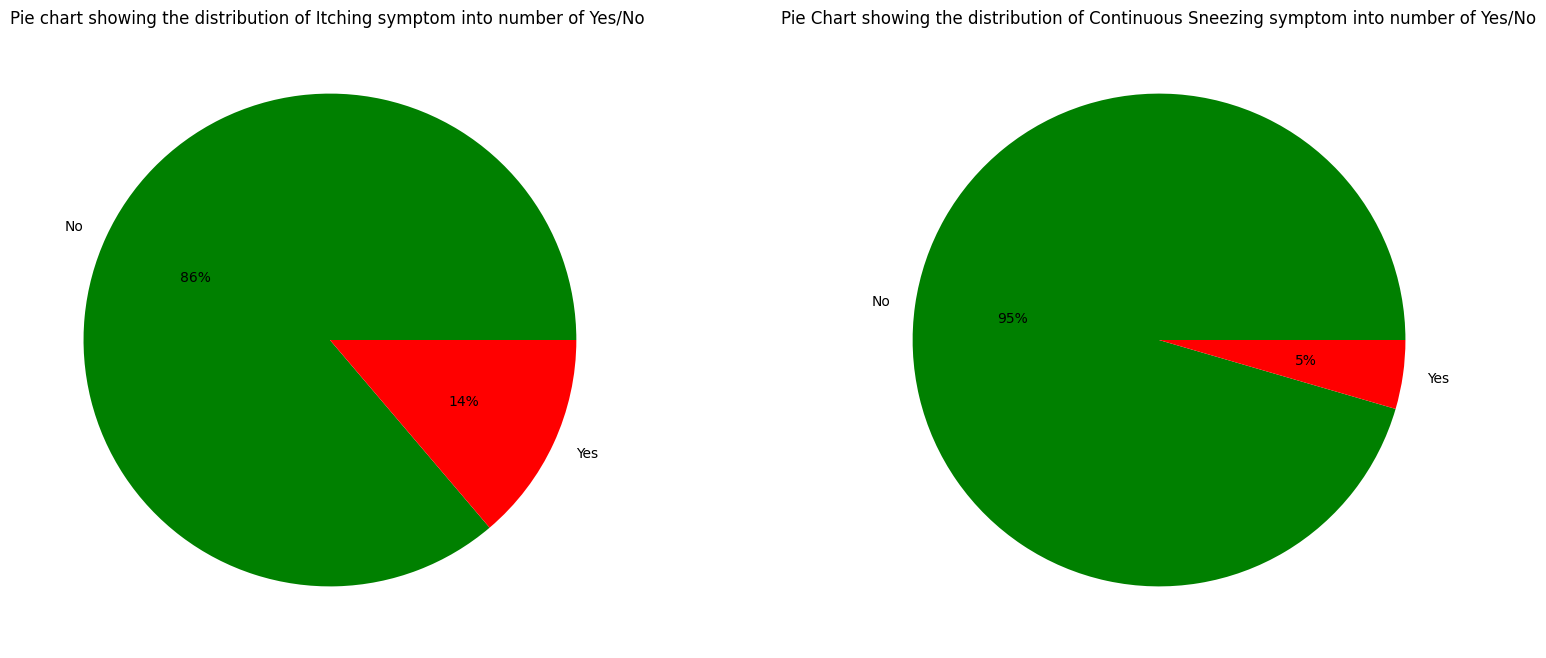

In [103]:
plt.figure(figsize = (8,8))

a = train['itching'].value_counts()
plt.subplot(121)
plt.pie(x = a, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title("Pie chart showing the distribution of Itching symptom into number of Yes/No ")

b = train['continuous_sneezing'].value_counts()
plt.subplot(122)
plt.pie(x = b, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title('Pie Chart showing the distribution of Continuous Sneezing symptom into number of Yes/No')

plt.subplots_adjust(left = 0.5, right = 2.4)

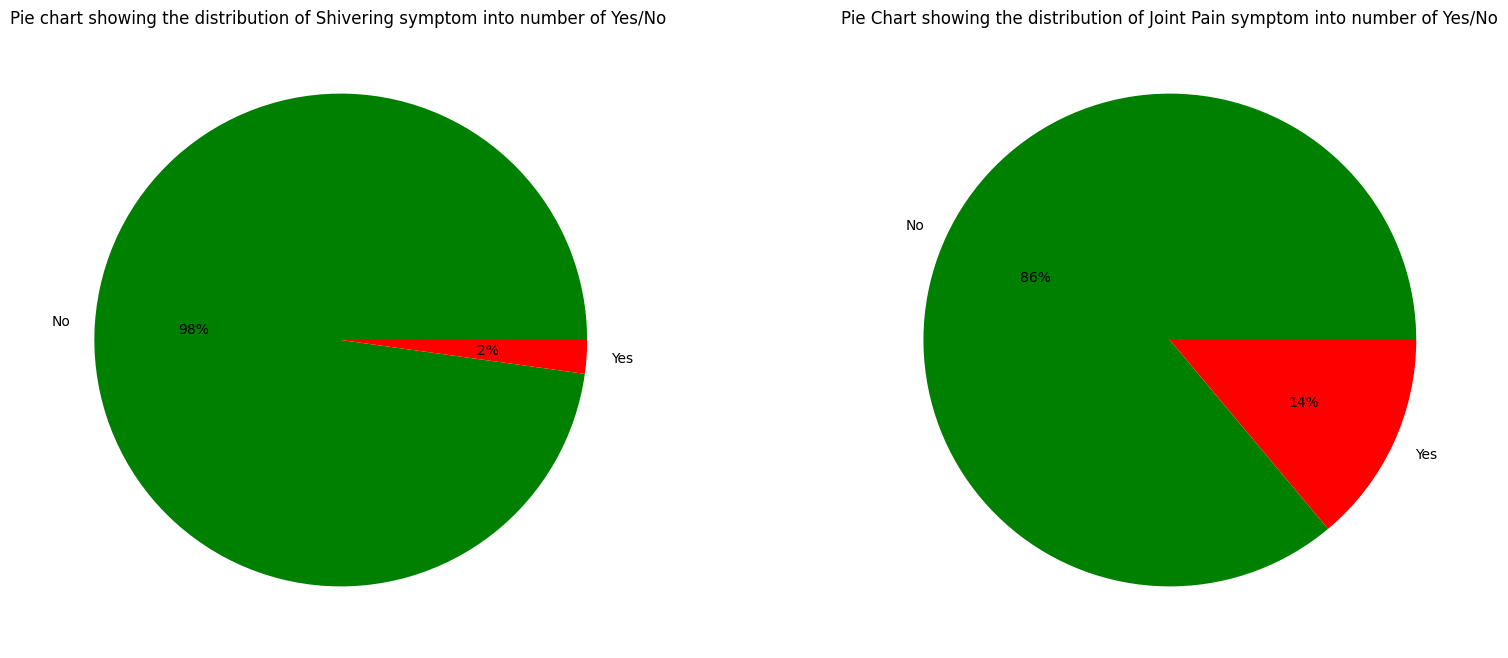

In [104]:
plt.figure(figsize = (8,8))

a = train['shivering'].value_counts()
plt.subplot(121)
plt.pie(x = a, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title("Pie chart showing the distribution of Shivering symptom into number of Yes/No ")

b = train['joint_pain'].value_counts()
plt.subplot(122)
plt.pie(x = b, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title('Pie Chart showing the distribution of Joint Pain symptom into number of Yes/No')

plt.subplots_adjust(left = 0.5, right = 2.4)

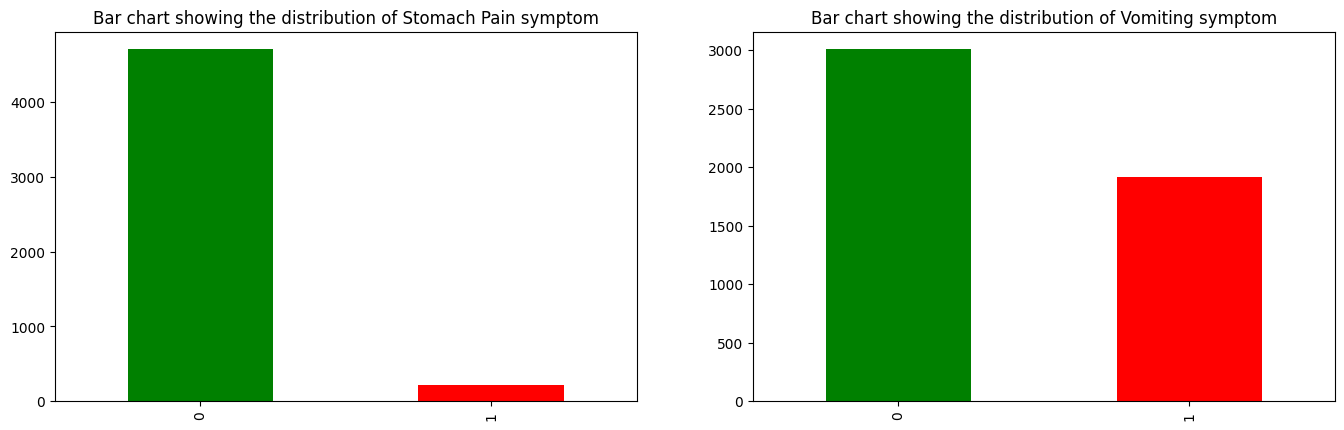

In [105]:
plt.subplot(1,2,1)
train['stomach_pain'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Stomach Pain symptom")

plt.subplot(1,2,2)
train['vomiting'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Vomiting symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

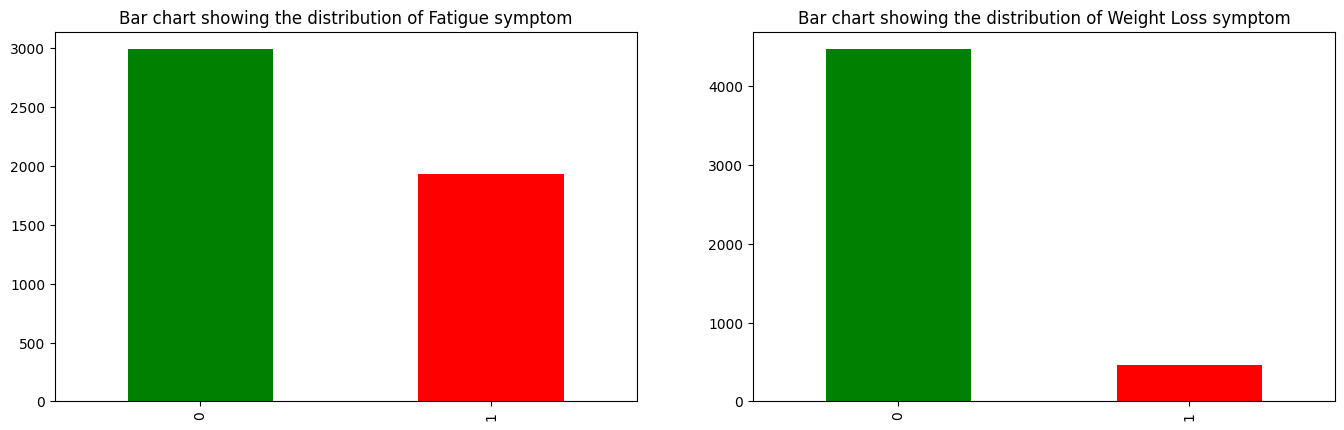

In [106]:
plt.subplot(1,2,1)
train['fatigue'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Fatigue symptom")

plt.subplot(1,2,2)
train['weight_loss'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Weight Loss symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

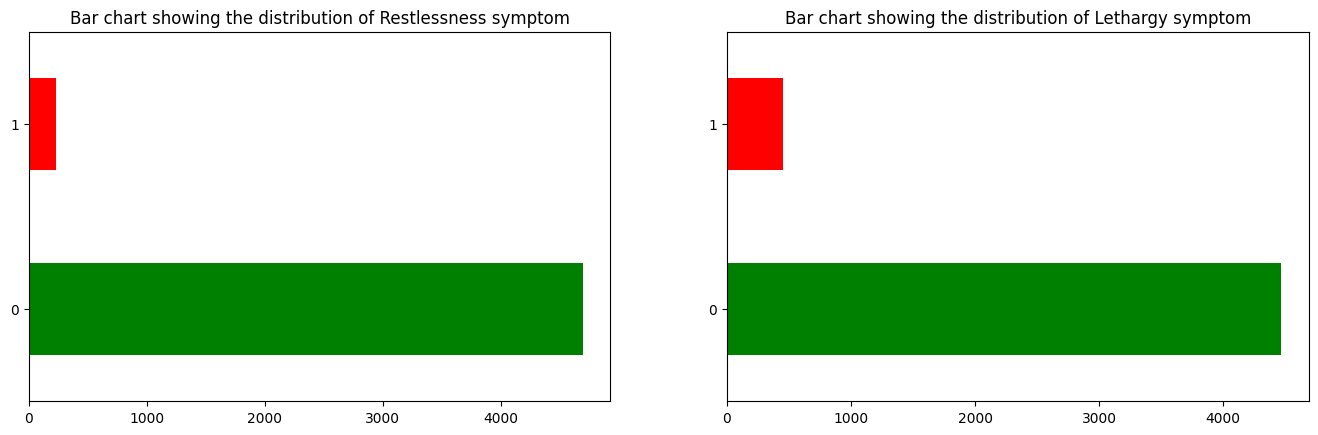

In [107]:
plt.subplot(1,2,1)
train['restlessness'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of Restlessness symptom")

plt.subplot(1,2,2)
train['lethargy'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of Lethargy symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

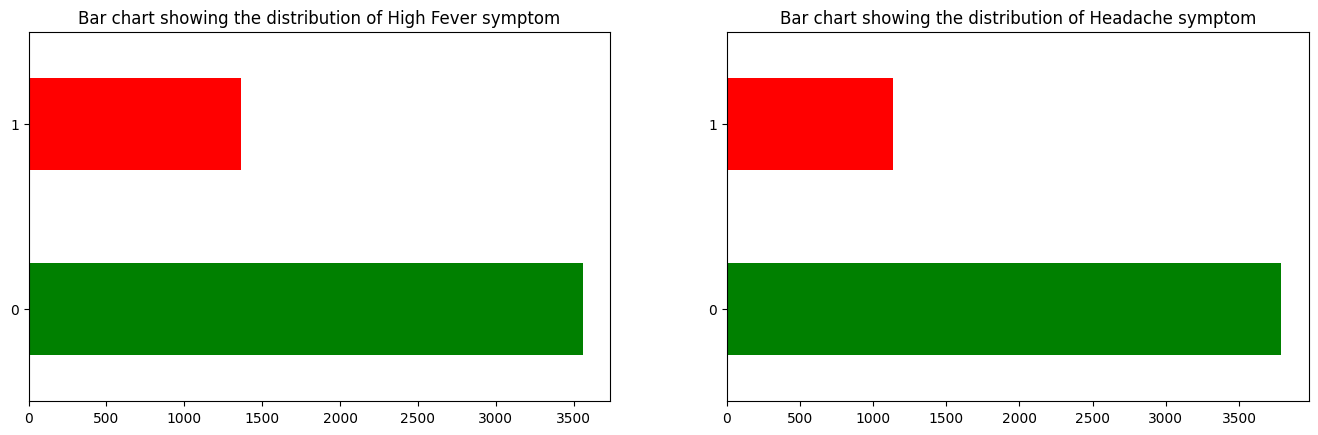

In [108]:
plt.subplot(1,2,1)
train['high_fever'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of High Fever symptom")

plt.subplot(1,2,2)
train['headache'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of Headache symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

In [109]:
train[(train['itching'] == 1) & (train['stomach_pain'] == 1)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
40,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
41,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
43,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
44,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
46,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4760,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4801,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4842,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


**Activity 2.2: Bivariate Analysis**

Text(0.5, 1.0, 'Importance of Itching symptom to determine Fungal Infection')

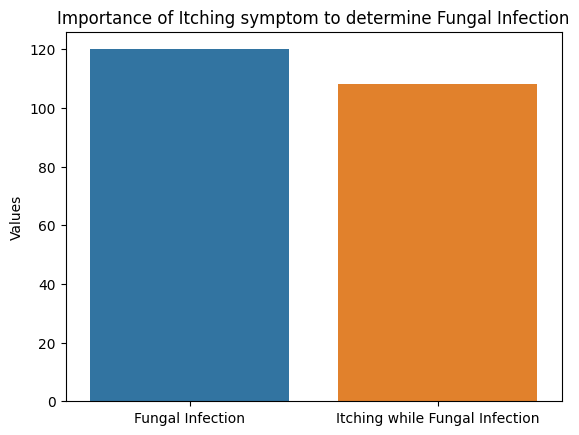

In [110]:
a = len(train[train['prognosis'] == 'Fungal infection'])
b = len(train[(train['itching'] == 1) & (train['prognosis'] == 'Fungal infection')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Fungal Infection','Itching while Fungal Infection'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Itching symptom to determine Fungal Infection')

Text(0.5, 1.0, 'Importance of High Fever symptom to determine Jaundice')

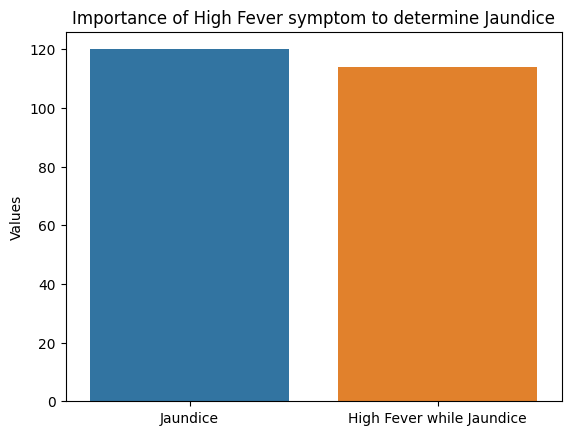

In [111]:
a = len(train[train['prognosis'] == 'Jaundice'])
b = len(train[(train['high_fever'] == 1) & (train['prognosis'] == 'Jaundice')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Jaundice','High Fever while Jaundice'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of High Fever symptom to determine Jaundice')

Text(0.5, 1.0, 'Importance of Yellowing of Eyes symptom to determine Tuberculosis')

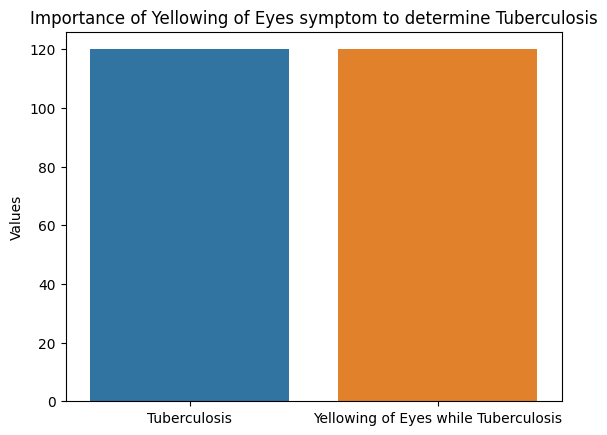

In [112]:

a = len(train[train['prognosis'] == 'Tuberculosis'])
b = len(train[(train['yellowing_of_eyes'] == 1) & (train['prognosis'] == 'Tuberculosis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Tuberculosis','Yellowing of Eyes while Tuberculosis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Yellowing of Eyes symptom to determine Tuberculosis')

Text(0.5, 1.0, 'Importance of History of Consumption symptom to determine Alcoholic hepatitis')

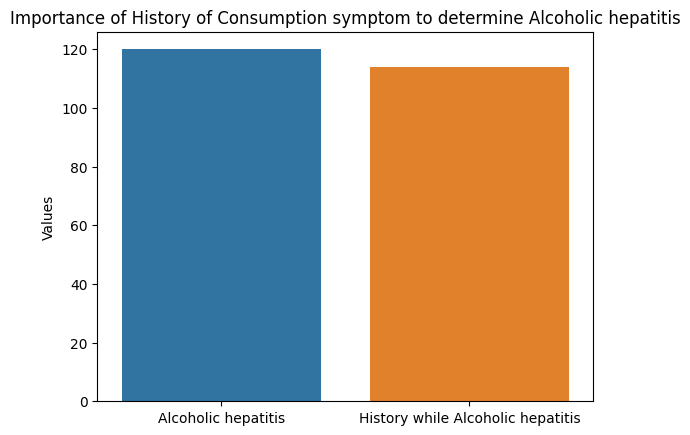

In [113]:

a = len(train[train['prognosis'] == 'Alcoholic hepatitis'])
b = len(train[(train['history_of_alcohol_consumption'] == 1) & (train['prognosis'] == 'Alcoholic hepatitis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Alcoholic hepatitis','History while Alcoholic hepatitis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of History of Consumption symptom to determine Alcoholic hepatitis')

In [114]:
a = train[train['prognosis'] == 'Tuberculosis']
a.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
250,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
251,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
252,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
253,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
254,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='weight_loss', ylabel='fatigue'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


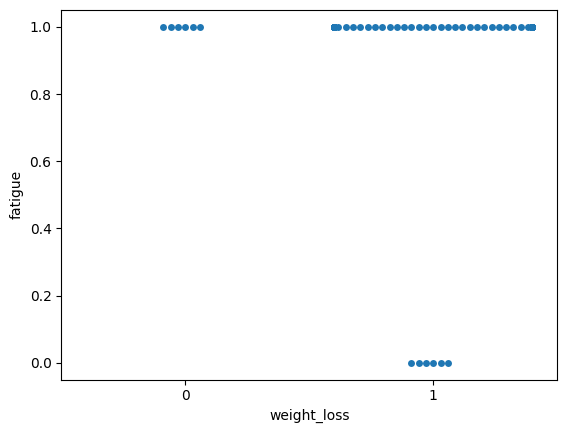

In [115]:
sns.swarmplot(x = a['weight_loss'], y = a['fatigue'])

In [116]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


**Preprocessing of Test data**

In [117]:
def data_preprocessing(data):
    data.drop(['fluid_overload','weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)
    return data

**Activity 2.5: Split data into training, validation and testing data**

In [118]:
X = train.drop('prognosis',axis = 1)
y = train.prognosis

In [119]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [120]:
test = data_preprocessing(test)

In [121]:
X_test = test.drop('prognosis',axis = 1)
y_test = test.prognosis

***Milestone 4: Model Building***

**Activity 1: Creating a function for model evaluation**

In [122]:
def model_evaluation(classifier):
    y_pred = classifier.predict(X_val)
    yt_pred = classifier.predict(X_train)
    y_pred1 = classifier.predict(X_test)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Validation Accuracy of the algorithm is ', accuracy_score(y_val, y_pred))
    print('The Testing Accuracy of the algorithm is', accuracy_score(y_test, y_pred1))
    return [(accuracy_score(y_train, yt_pred)), (accuracy_score(y_val, y_pred)), (accuracy_score(y_test, y_pred1))]

**Activity 2.1: K Nearest Neighbors Model**

In [123]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [124]:
knn_results = model_evaluation(knn)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


**Activity 2.2: SVM Model**

In [125]:
svm = SVC(C=1)
svm.fit(X_train, y_train)

SVC(C=1)

In [126]:
svm_results = model_evaluation(svm)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


**Activity 2.3: Decision Tree Model**

In [127]:
dtc = DecisionTreeClassifier(max_features= 10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_features=10)

In [128]:
dtc_results = model_evaluation(dtc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


**Activity 2.4: Random Forest Model**

In [129]:
rfc = RandomForestClassifier(max_depth = 13)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=13)

In [130]:
rfc_results = model_evaluation(rfc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


***Milestone 5 : Performance Testing & Hyperparameter Tuning***

**Activity 1: Testing model with Multiple Evaluatiton metrics**

In [131]:
results = pd.DataFrame(data = [knn_results, svm_results, dtc_results, rfc_results],
                      columns= ['Training Accuracy','Validation Accuracy', 'Testing Accuracy'],
                      index = ['K Nearest Neighbors Classifier','Support Vector Machines',
                               'Decision Trees Classifier', 'Random Forest Classifier'])

In [132]:
results

,Training Accuracy,Validation Accuracy,Testing Accuracy
K Nearest Neighbors Classifier,1.0,1.0,1.00000
Support Vector Machines,1.0,1.0,1.00000
Decision Trees Classifier,1.0,1.0,0.97619
Random Forest Classifier,1.0,1.0,0.97619


**Activity 3: Comparing Model accuracy for different number of features.**

In [133]:
a = rfc.feature_importances_

In [134]:
col = X.columns

In [135]:
feat_imp = {}
for i, j in zip(a,col):
    feat_imp[j] = i

In [136]:
feat_imp

{'itching': 0.016822612738869976,
 'skin_rash': 0.0048482863953731746,
 'nodal_skin_eruptions': 0.009130104193228732,
 'continuous_sneezing': 0.0067399281482378144,
 'shivering': 0.010567820606662845,
 'chills': 0.009772713227476231,
 'joint_pain': 0.01268622979247319,
 'stomach_pain': 0.007886821250174713,
 'acidity': 0.007578416163304224,
 'ulcers_on_tongue': 0.008054266956973243,
 'muscle_wasting': 0.001305266557072911,
 'vomiting': 0.011924671829487796,
 'burning_micturition': 0.004272266894644475,
 'spotting_ urination': 0.009301155469341267,
 'fatigue': 0.011640865013673366,
 'weight_loss': 0.022466875533749465,
 'restlessness': 0.012140143081479905,
 'lethargy': 0.01323425965592772,
 'patches_in_throat': 0.0022903971384796713,
 'cough': 0.009216573626963974,
 'high_fever': 0.017751404671031337,
 'sunken_eyes': 0.0031824260095096647,
 'breathlessness': 0.012937643174779223,
 'sweating': 0.015301762609908119,
 'dehydration': 0.004439822663344831,
 'indigestion': 0.0034673789836846

In [137]:
def model_evaluation1(n_feat,classifier):
    y_pred = classifier.predict(X1_val)
    yt_pred = classifier.predict(X1_train)
    y_pred1 = classifier.predict(X1_test)
    return [(n_feat),(accuracy_score(y1_train, yt_pred)), (accuracy_score(y1_test, y_pred1))]

In [138]:
rfc_results = []
knn_results = []

In [139]:
for main in [0.020,0.018,0.016,0.014,0.012,0.01,0.008]:
    to_drop = []
    for i,j in zip(feat_imp.keys(),feat_imp.values()):
        if j < main:
            to_drop.append(i)

    X_new = X.drop(to_drop,axis = 1)
    y_new = y
    X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
    X1_test = X_test.drop(to_drop,axis = 1)
    y1_test = y_test
    rfc_new = RandomForestClassifier()
    rfc_new.fit(X1_train, y1_train)
    temp1 = model_evaluation1(X1_train.shape[1], rfc_new)
    rfc_results.append(temp1)
    knn_new = KNeighborsClassifier()
    knn_new.fit(X1_train, y1_train)
    temp2 = model_evaluation1(X1_train.shape[1],knn_new)
    knn_results.append(temp2)

In [140]:
randomf = pd.DataFrame(data = rfc_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [141]:
randomf

,Number of features,Training Accuracy,Testing Accuracy
0,6,0.238059,0.238095
1,10,0.362297,0.357143
2,21,0.644563,0.642857
3,26,0.689787,0.690476
4,38,0.793953,0.785714
5,49,0.909553,0.904762
6,62,0.966717,0.952381


In [142]:
knn_table = pd.DataFrame(data = knn_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [143]:
knn_table

,Number of features,Training Accuracy,Testing Accuracy
0,6,0.237043,0.238095
1,10,0.360772,0.357143
2,21,0.641514,0.666667
3,26,0.686230,0.690476
4,38,0.792429,0.809524
5,49,0.906504,0.904762
6,62,0.966717,0.976190


In [144]:
to_drop = []
for i,j in zip(feat_imp.keys(),feat_imp.values()):
    if j < 0.01:
        to_drop.append(i)

In [145]:
len(to_drop)

40

In [146]:
X_new = X.drop(to_drop,axis = 1)
y_new = y

In [147]:
X_new.head()

,itching,shivering,joint_pain,vomiting,fatigue,weight_loss,restlessness,lethargy,high_fever,breathlessness,...,abnormal_menstruation,increased_appetite,family_history,rusty_sputum,visual_disturbances,receiving_blood_transfusion,coma,palpitations,inflammatory_nails,yellow_crust_ooze
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
X1_test = X_test.drop(to_drop,axis = 1)
y1_test = y_test

In [149]:
rfc_new = RandomForestClassifier()
rfc_new.fit(X1_train, y1_train)

RandomForestClassifier()

In [150]:
y_pred = rfc_new.predict(X1_val)
yt_pred = rfc_new.predict(X1_train)
y_pred1 = rfc_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.9090447154471545
The Validation Accuracy of the algorithm is  0.9065040650406504
The Testing Accuracy of the algorithm is 0.9047619047619048


In [151]:
knn_new = KNeighborsClassifier()
knn_new.fit(X1_train, y1_train)

KNeighborsClassifier()

In [152]:
y_pred = knn_new.predict(X1_val)
yt_pred = knn_new.predict(X1_train)
y_pred1 = knn_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.9077743902439024
The Validation Accuracy of the algorithm is  0.9115853658536586
The Testing Accuracy of the algorithm is 0.9047619047619048


In [153]:
test.join(pd.DataFrame(y_pred1,columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Drug Reaction
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [154]:
X1_train.sum(axis = 1).max()

13

In [155]:
X1_train.columns

Index(['itching', 'shivering', 'joint_pain', 'vomiting', 'fatigue',
       'weight_loss', 'restlessness', 'lethargy', 'high_fever',
       'breathlessness', 'sweating', 'headache', 'dark_urine', 'nausea',
       'loss_of_appetite', 'constipation', 'diarrhoea', 'mild_fever',
       'yellowing_of_eyes', 'swelled_lymph_nodes', 'malaise', 'phlegm',
       'congestion', 'chest_pain', 'fast_heart_rate', 'irritation_in_anus',
       'obesity', 'swollen_legs', 'excessive_hunger', 'knee_pain',
       'muscle_weakness', 'stiff_neck', 'unsteadiness', 'passage_of_gases',
       'depression', 'irritability', 'muscle_pain', 'red_spots_over_body',
       'belly_pain', 'abnormal_menstruation', 'increased_appetite',
       'family_history', 'rusty_sputum', 'visual_disturbances',
       'receiving_blood_transfusion', 'coma', 'palpitations',
       'inflammatory_nails', 'yellow_crust_ooze'],
      dtype='object')

***Outlier Visualization***

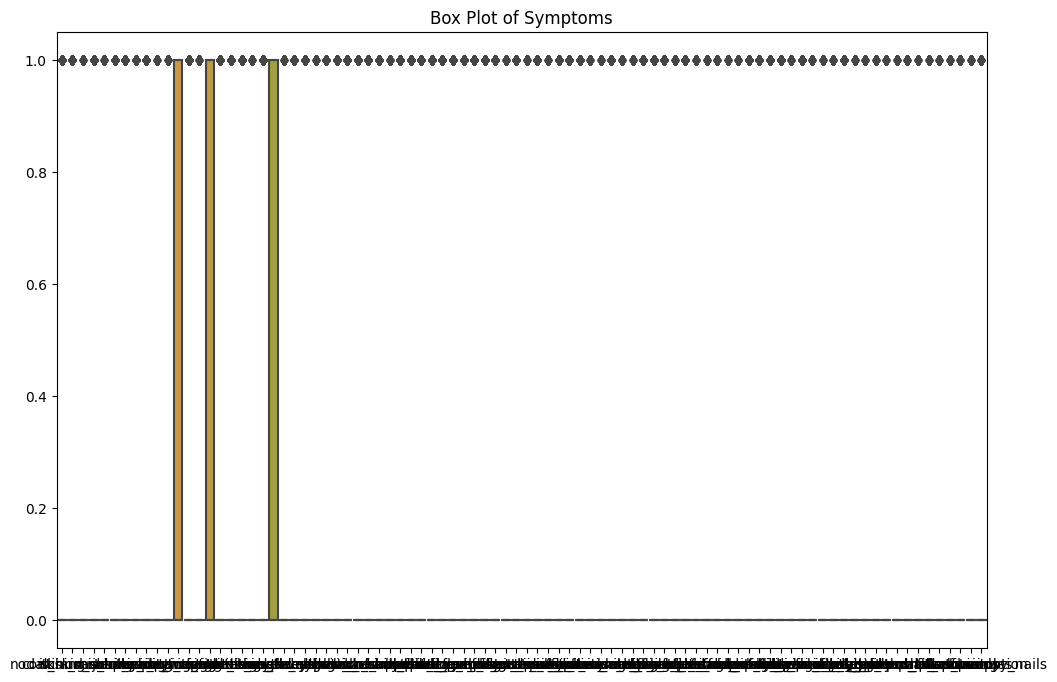

In [156]:
symptom_columns = train.columns[:-2]

plt.figure(figsize=(12, 8))
sns.boxplot(data=train[symptom_columns])
plt.title('Box Plot of Symptoms')
plt.show()

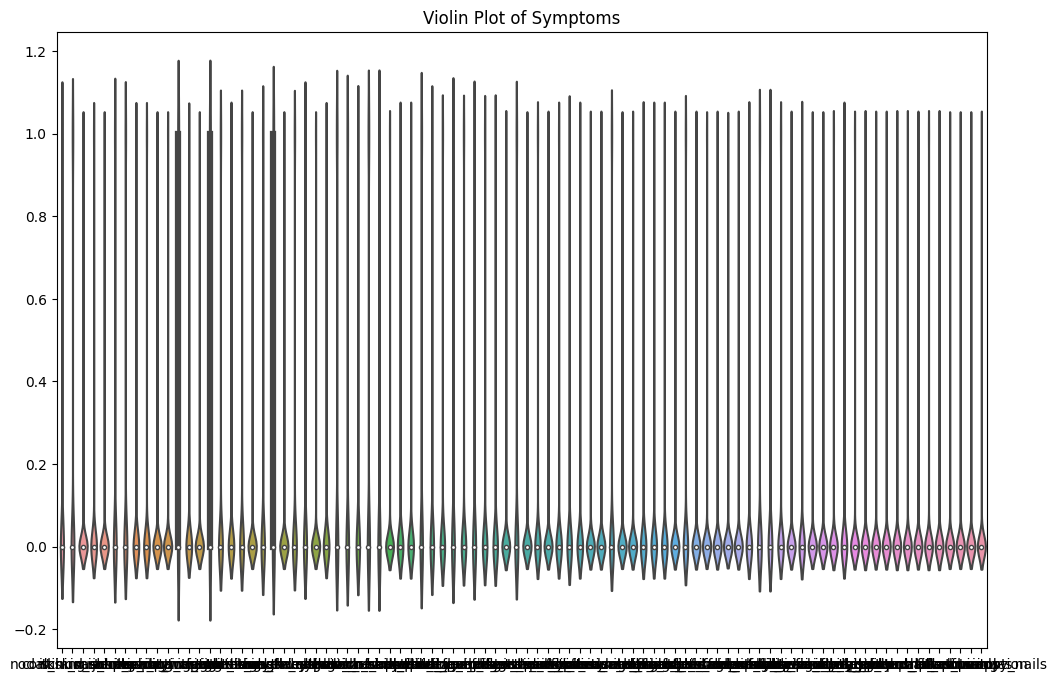

In [157]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=train[symptom_columns])
plt.title('Violin Plot of Symptoms')
plt.show()

***Milestone 6: Model Deployment***

**Activity 1: Save the best model**

In [158]:
pickle.dump(knn_new, open('model.pkl','wb'))